In [7]:
! pip install qiskit

In [8]:
! pip install qiskit-machine-learning

In [9]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from qiskit import *

# External imports
from pylab import cm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
#from qiskit.algorithms.optimizers import SPSA

from qiskit.circuit.library import PauliFeatureMap
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data

#from qiskit.utils import QuantumInstance
#from qiskit_machine_learning.kernels import QuantumKernel

import random
import time
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv('Thesis IBM Dataset.csv')
df.head()

,Date,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,27-06-2023,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0.0,1,0,0
1,27-06-2023,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0.0,1,0,0
2,27-06-2023,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1.0,1,0,0
3,27-06-2023,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1.0,1,0,0
4,27-06-2023,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0.0,0,1,0


In [11]:
for col in df.columns:
    if (col == 'Rain'):
       
        df[col] = np.where(df[col] == 0.0, 0, 1)
df

,Date,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,27-06-2023,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0,1,0,0
1,27-06-2023,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0,1,0,0
2,27-06-2023,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1,1,0,0
3,27-06-2023,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1,1,0,0
4,27-06-2023,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,31-12-2023,19:00,20,20,1,77,8.0,1014,Clear,Clear,0,0,1,0
4500,31-12-2023,20:00,19,19,1,80,14.0,1015,Clear,Clear,0,0,1,0
4501,31-12-2023,21:00,19,19,2,82,14.0,1015,Clear,Clear,0,0,1,0
4502,31-12-2023,22:00,18,18,2,83,14.0,1015,Clear,Clear,0,0,1,0


In [12]:
df.drop(columns=['Date'], inplace=True)
#df.drop(columns=['Temperature(C)'], inplace=True)
df

,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0,1,0,0
1,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0,1,0,0
2,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1,1,0,0
3,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1,1,0,0
4,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,19:00,20,20,1,77,8.0,1014,Clear,Clear,0,0,1,0
4500,20:00,19,19,1,80,14.0,1015,Clear,Clear,0,0,1,0
4501,21:00,19,19,2,82,14.0,1015,Clear,Clear,0,0,1,0
4502,22:00,18,18,2,83,14.0,1015,Clear,Clear,0,0,1,0


In [13]:
df.dropna(inplace=True)
df

,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0,1,0,0
1,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0,1,0,0
2,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1,1,0,0
3,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1,1,0,0
4,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,19:00,20,20,1,77,8.0,1014,Clear,Clear,0,0,1,0
4500,20:00,19,19,1,80,14.0,1015,Clear,Clear,0,0,1,0
4501,21:00,19,19,2,82,14.0,1015,Clear,Clear,0,0,1,0
4502,22:00,18,18,2,83,14.0,1015,Clear,Clear,0,0,1,0


In [14]:
df.drop(columns=['Time', 'State','Real State'], inplace=True)
df

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain,Cloudy,Sunny,Fog
0,27,32,21,87,3.0,1003,0,1,0,0
1,27,32,22,86,9.0,1003,0,1,0,0
2,28,34,23,90,3.0,1003,1,1,0,0
3,28,33,30,85,9.0,1003,1,1,0,0
4,27,32,53,90,9.0,1003,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,1014,0,0,1,0
4500,19,19,1,80,14.0,1015,0,0,1,0
4501,19,19,2,82,14.0,1015,0,0,1,0
4502,18,18,2,83,14.0,1015,0,0,1,0


In [15]:
df.drop(columns=['Sunny','Fog'], inplace=True)
df

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain,Cloudy
0,27,32,21,87,3.0,1003,0,1
1,27,32,22,86,9.0,1003,0,1
2,28,34,23,90,3.0,1003,1,1
3,28,33,30,85,9.0,1003,1,1
4,27,32,53,90,9.0,1003,0,0
...,...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,1014,0,0
4500,19,19,1,80,14.0,1015,0,0
4501,19,19,2,82,14.0,1015,0,0
4502,18,18,2,83,14.0,1015,0,0


In [16]:
def create_training_and_testing_data_sub(df_, DATA_SIZE_):
    data_size = DATA_SIZE_

    indices = np.random.choice(df.index, size=data_size, replace=False)
    subset_df = df.loc[indices]

    print(indices)

    # get the values from the last column of the subset and store them in y_subset
    y_subset = subset_df['Cloudy'].values

    # get the values from all other columns of the subset and store them in X_subset
    x_subset = subset_df.iloc[:, :-1].values

    # spltting the dataset into train and test set
    x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size = 0.2, random_state = 31)

    return x_train, x_test, y_train, y_test

In [17]:
NUM_OF_EXPERIMENTS = int(input("Number of experiments to run: "))
DATA_SIZE = int(input("Size of dataset: "))
NUM_MAX_ITER = int(input("Number of max iterations: "))
data = []

for current_iter in range(NUM_OF_EXPERIMENTS):

    X_train, X_test, y_train, y_test = create_training_and_testing_data_sub(df, DATA_SIZE)

    data.append([X_train, X_test, y_train, y_test])

Number of experiments to run:  100
Size of dataset:  200
Number of max iterations:  1


[ 684 1201 2935  837 1250 2822 3013 3126 1346  999 3503 2679 3985 2019
 2987 3717 1135 3680 2573 3608 4448 3243  576 2788 3097 3283 4018 1471
  876 1935 4237 1306 3756 4350 3540  778  426 3230  267 1753 1738 3659
 2741 4306  968  661 1692  653 4351 1233  899 1476 2645 2885 3432 2876
  643 3613 1813  609  257 1396  495 2080  762 2418 4470 3039 1960 1257
 4454 1706 4369 2185 3875 3508 1078 1771 4225    1  761 3484  723 1344
 3270 2386 4211 3028 4285 4324 4362 3665 1051  886 3623  701  868  377
 3073  184 3430  527  125 2495 1604  167 1674 3639 3071 2525 1996 2378
 3931 2627  706 2109 2661 2391 2105  222 1146 2747   13  600  678 1688
 4068 2623 3923  913 1158 3963 1254  246 3879 3824  749  456 4250  854
 3407 2755 3819  903 3566  111 4328 1523 3637 2844 3765 3476 1305  202
  150 1819 3036 4179 2299 3891 4181  406 2575  502 3421 2305 2097  588
  619 2214  895  286 3564 1286 1316  793 3669   40 2832  475 2276  526
  674 1461  620 2864  250  545 1047 1112 1611 2949 1389 1308 1290 1828
 3360 

In [18]:
def find_classical_accuracy(x_train_, x_test_, y_train_, y_test_):

    svc_clf = svm.SVC(random_state = 7)
    svc_clf.fit(x_train_, y_train_)
    labels_pred = svc_clf.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [19]:
def find_classical_accuracy_dt(x_train_, x_test_, y_train_, y_test_):
    clf = DecisionTreeClassifier(random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train_, y_train)

    # Make predictions on the testing data
    labels_pred = clf.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [20]:
def find_classical_accuracy_rf(x_train_, x_test_, y_train_, y_test_):
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier on the training data
    rfc.fit(X_train, y_train)


    # Make predictions on the testing data
    labels_pred = rfc.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [21]:
svc_acc = []
svc_bacc = []
svc_f1_score = []
total_time_elapsed = 0

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy(X_train, X_test, y_train, y_test)
    svc_acc.append(accuracy_svm)
    svc_bacc.append(balanced_accuracy_svm)
    svc_f1_score.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"-------------------------------------------------------------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.475, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.375, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.675, 0.6654135338345865, 0.5806451612903226
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.575, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.5, 0.5, 0.0
-----------------------

In [22]:
print(svc_acc)
print("For Classical SVM:")
print("Mean Accuracy:       ", np.array(svc_acc).mean())
print("Standard deviation:  ", np.array(svc_acc).std())
print("Minimum Accuracy:    ", np.array(svc_acc).min())
print("Maximum Accuracy:    ", np.array(svc_acc).max())
svc_avg = np.array(svc_acc).mean()
svc_min = np.array(svc_acc).min()
svc_max = np.array(svc_acc).max()

[0.475, 0.375, 0.675, 0.575, 0.5, 0.525, 0.55, 0.525, 0.45, 0.625, 0.525, 0.3, 0.725, 0.5, 0.575, 0.425, 0.5, 0.5, 0.575, 0.5, 0.425, 0.6, 0.475, 0.6, 0.575, 0.525, 0.425, 0.45, 0.725, 0.475, 0.55, 0.55, 0.8, 0.675, 0.65, 0.55, 0.55, 0.525, 0.6, 0.5, 0.35, 0.475, 0.65, 0.475, 0.625, 0.55, 0.625, 0.475, 0.475, 0.525, 0.75, 0.475, 0.45, 0.6, 0.6, 0.425, 0.45, 0.575, 0.55, 0.55, 0.425, 0.625, 0.5, 0.575, 0.475, 0.65, 0.375, 0.5, 0.45, 0.35, 0.475, 0.55, 0.5, 0.525, 0.775, 0.625, 0.475, 0.325, 0.475, 0.45, 0.375, 0.575, 0.425, 0.475, 0.45, 0.475, 0.55, 0.675, 0.525, 0.825, 0.525, 0.5, 0.425, 0.6, 0.6, 0.6, 0.475, 0.475, 0.6, 0.375]
For Classical SVM:
Mean Accuracy:        0.529
Standard deviation:   0.09966945369570358
Minimum Accuracy:     0.3
Maximum Accuracy:     0.825


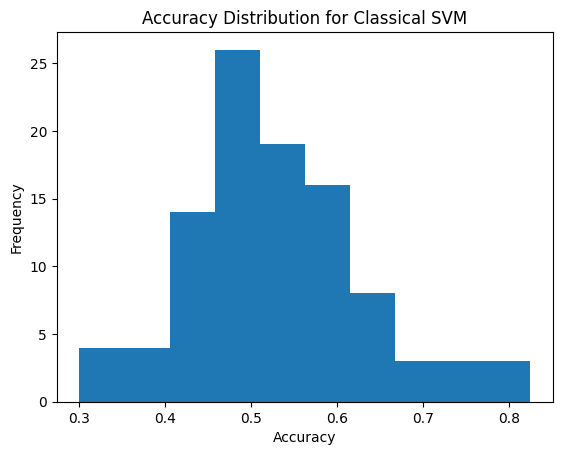

In [23]:
plt.hist(np.array(svc_acc))
plt.title('Accuracy Distribution for Classical SVM')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [24]:
print(svc_bacc)
print("For Classical SVM:")
print("Mean Balanced Accuracy:       ", np.array(svc_bacc).mean())
print("Standard deviation:  ", np.array(svc_bacc).std())
print("Minimum Balanced Accuracy:    ", np.array(svc_bacc).min())
print("Maximum Balanced Accuracy:    ", np.array(svc_bacc).max())
svc_avg = np.array(svc_bacc).mean()
svc_min = np.array(svc_bacc).min()
svc_max = np.array(svc_bacc).max()

[0.5, 0.5, 0.6654135338345865, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.7449494949494949, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.7333333333333334, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.7307692307692308, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
For Classical SVM:
Mean Balanced Accuracy:        0.5087446559288664
Standard deviation:   0.043291324053960224
Minimum Balanced Accuracy:     0.5
Maximum Balanced Accuracy:     0.7449494949494949


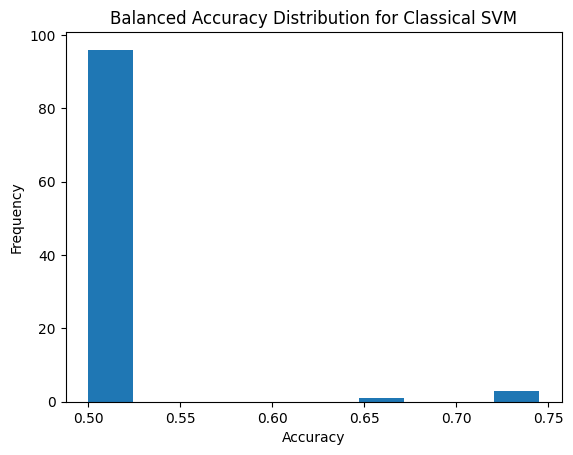

In [25]:
plt.hist(np.array(svc_bacc))
plt.title('Balanced Accuracy Distribution for Classical SVM')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [26]:
from sklearn.tree import DecisionTreeClassifier

svc_acc_dt = []
svc_bacc_dt = []
svc_f1_score_dt = []

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy_dt(X_train, X_test, y_train, y_test)
    svc_acc_dt.append(accuracy_svm)
    svc_bacc_dt.append(balanced_accuracy_svm)
    svc_f1_score_dt.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"-----------------------------------------------------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.825, 0.8258145363408521, 0.8292682926829268
-----------------------------------------------------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.75, 0.7333333333333334, 0.8
-----------------------------------------------------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.875, 0.8759398496240601, 0.8717948717948718
-----------------------------------------------------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.825, 0.809462915601023, 0.7741935483870968
-----------------------------------------------------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical S

In [27]:
print(svc_acc_dt)
print("For Classical Decision Tree:")
print("Mean Accuracy:       ", np.array(svc_acc_dt).mean())
print("Standard deviation:  ", np.array(svc_acc_dt).std())
print("Minimum Accuracy:    ", np.array(svc_acc_dt).min())
print("Maximum Accuracy:    ", np.array(svc_acc_dt).max())
svc_avg = np.array(svc_acc_dt).mean()
svc_min = np.array(svc_acc_dt).min()
svc_max = np.array(svc_acc_dt).max()

[0.825, 0.75, 0.875, 0.825, 0.825, 0.75, 0.9, 0.85, 0.775, 0.75, 0.85, 0.8, 0.9, 0.75, 0.9, 0.9, 0.775, 0.8, 0.825, 0.775, 0.875, 0.875, 0.8, 0.75, 0.8, 0.825, 0.775, 0.875, 0.8, 0.85, 0.85, 0.725, 0.8, 0.85, 0.8, 0.85, 0.95, 0.825, 0.85, 0.9, 0.725, 0.775, 0.775, 0.8, 0.85, 0.625, 0.6, 0.725, 0.775, 0.8, 0.875, 0.825, 0.8, 0.825, 0.95, 0.85, 0.75, 0.825, 0.875, 0.875, 0.875, 0.825, 0.7, 0.675, 0.825, 0.775, 0.925, 0.85, 0.825, 0.7, 0.775, 0.8, 0.775, 0.8, 0.9, 0.95, 0.85, 0.825, 0.825, 0.85, 0.9, 0.85, 0.925, 0.9, 0.825, 0.75, 0.9, 0.9, 0.9, 0.875, 0.85, 0.85, 0.725, 0.75, 0.925, 0.825, 0.775, 0.775, 0.85, 0.825]
For Classical Decision Tree:
Mean Accuracy:        0.8212500000000001
Standard deviation:   0.06608469943943152
Minimum Accuracy:     0.6
Maximum Accuracy:     0.95


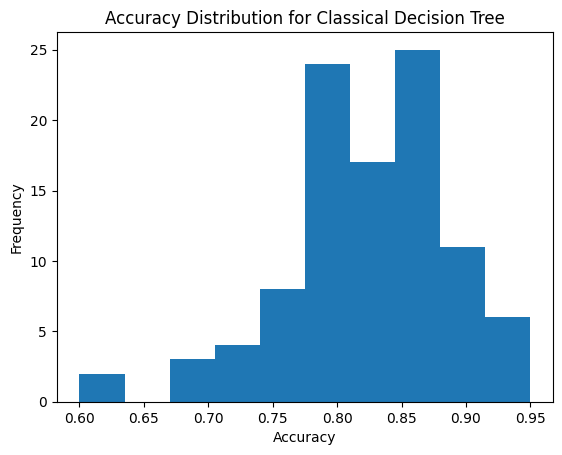

In [28]:
plt.hist(np.array(svc_acc_dt))
plt.title('Accuracy Distribution for Classical Decision Tree')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

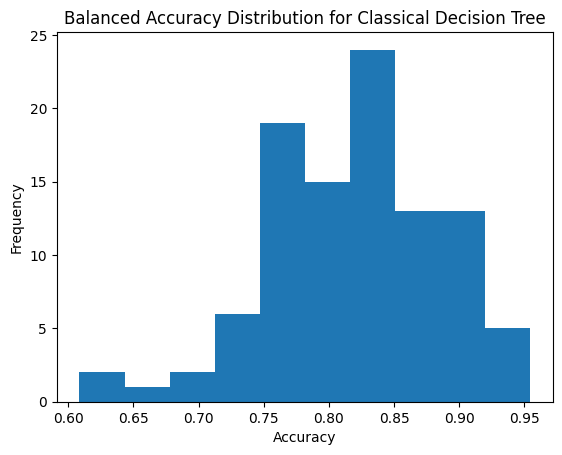

In [29]:
plt.hist(np.array(svc_bacc_dt))
plt.title('Balanced Accuracy Distribution for Classical Decision Tree')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [30]:
from sklearn.ensemble import RandomForestClassifier

svc_acc_rf = []
svc_bacc_rf = []
svc_f1_score_rf = []
total_time_elapsed = 0

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy_rf(X_train, X_test, y_train, y_test)
    svc_acc_rf.append(accuracy_svm)
    svc_bacc_rf.append(balanced_accuracy_svm)
    svc_f1_score_rf.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"----------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.85, 0.8521303258145363, 0.85
----------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.8, 0.76, 0.8518518518518519
----------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.875, 0.8759398496240601, 0.8717948717948718
----------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.8976982097186701, 0.8823529411764706
----------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.85, 0.8500000000000001, 0.8571428571428571
----------------------------------------------------------------
Current experiment no: 6
Accuracy, Balanced Accuracy and F1 Score Classica

In [31]:
print(svc_acc_rf)
print("For Classical SVM:")
print("Mean Accuracy:       ", np.array(svc_acc_rf).mean())
print("Standard deviation:  ", np.array(svc_acc_rf).std())
print("Minimum Accuracy:    ", np.array(svc_acc_rf).min())
print("Maximum Accuracy:    ", np.array(svc_acc_rf).max())
svc_avg = np.array(svc_acc_rf).mean()
svc_min = np.array(svc_acc_rf).min()
svc_max = np.array(svc_acc_rf).max()

[0.85, 0.8, 0.875, 0.9, 0.85, 0.825, 0.9, 0.925, 0.85, 0.85, 0.8, 0.875, 0.925, 0.875, 0.85, 0.925, 0.825, 0.875, 0.875, 0.85, 0.875, 0.875, 0.85, 0.775, 0.975, 0.8, 0.85, 0.925, 0.925, 0.875, 0.9, 0.8, 0.925, 0.9, 0.875, 0.85, 0.975, 0.925, 0.875, 0.925, 0.8, 0.9, 0.85, 0.825, 0.85, 0.8, 0.75, 0.8, 0.9, 0.875, 0.9, 0.9, 0.85, 0.775, 0.95, 0.9, 0.8, 0.95, 1.0, 0.875, 0.9, 0.875, 0.825, 0.825, 0.9, 0.825, 0.925, 0.925, 0.9, 0.7, 0.85, 0.85, 0.9, 0.8, 0.9, 0.9, 0.925, 0.875, 0.875, 0.925, 0.85, 0.85, 0.925, 0.9, 0.85, 0.825, 0.9, 0.925, 0.925, 0.925, 0.875, 0.9, 0.925, 0.8, 0.875, 0.9, 0.85, 0.8, 0.875, 0.85]
For Classical SVM:
Mean Accuracy:        0.8714999999999999
Standard deviation:   0.05074692108887001
Minimum Accuracy:     0.7
Maximum Accuracy:     1.0


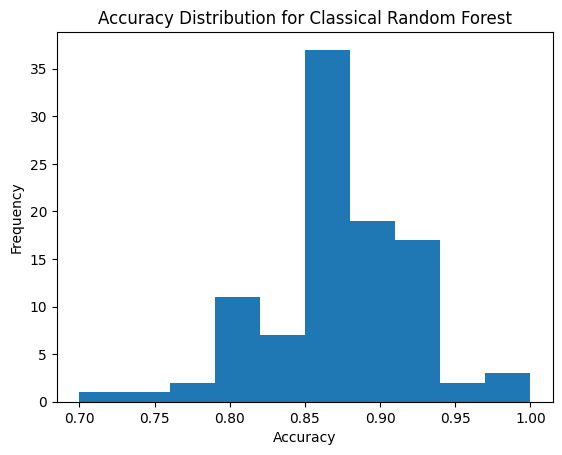

In [32]:
plt.hist(np.array(svc_acc_rf))
plt.title('Accuracy Distribution for Classical Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [33]:
print(svc_bacc_rf)
print("For Classical Random Forest:")
print("Mean Balanced Accuracy:       ", np.array(svc_bacc_rf).mean())
print("Standard deviation:  ", np.array(svc_bacc_rf).std())
print("Minimum Balanced Accuracy:    ", np.array(svc_bacc_rf).min())
print("Maximum Balanced Accuracy:    ", np.array(svc_bacc_rf).max())
svc_avg = np.array(svc_bacc_rf).mean()
svc_min = np.array(svc_bacc_rf).min()
svc_max = np.array(svc_bacc_rf).max()

[0.8521303258145363, 0.76, 0.8759398496240601, 0.8976982097186701, 0.8500000000000001, 0.8208020050125313, 0.893939393939394, 0.9260651629072681, 0.8434343434343434, 0.8533333333333333, 0.8020050125313283, 0.8630952380952381, 0.9267676767676767, 0.875, 0.8542199488491049, 0.9194373401534527, 0.825, 0.875, 0.860613810741688, 0.85, 0.8759590792838874, 0.875, 0.8571428571428572, 0.8020833333333333, 0.9705882352941176, 0.8020050125313283, 0.8542199488491049, 0.9267676767676767, 0.9482758620689655, 0.8734335839598997, 0.904040404040404, 0.803030303030303, 0.9266666666666667, 0.886039886039886, 0.8379120879120879, 0.8383838383838385, 0.9722222222222222, 0.9260651629072681, 0.84375, 0.925, 0.8131868131868132, 0.8947368421052632, 0.8186813186813187, 0.8308270676691729, 0.8666666666666667, 0.7929292929292929, 0.7733333333333334, 0.7994987468671679, 0.899749373433584, 0.8709273182957393, 0.8333333333333333, 0.899749373433584, 0.8636363636363636, 0.7916666666666667, 0.9375, 0.9130434782608696, 0.

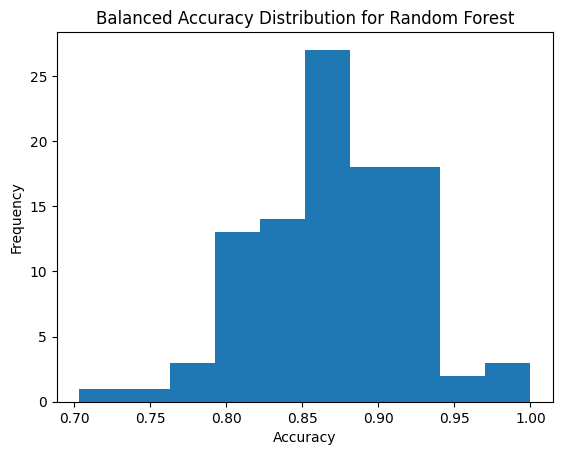

In [34]:
plt.hist(np.array(svc_bacc_rf))
plt.title('Balanced Accuracy Distribution for Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [35]:
def find_closest_to_mean(arr):
    mean = sum(arr) / len(arr)  # Calculate mean of the list

    # Calculate the differences between each element and the mean, and store them in a tuple with their index
    diff_indices = [(abs(x - mean), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [36]:
def find_closest_to_max(arr):
    max_val = max(arr)  # Calculate max of the list

    # Calculate the differences between each element and the max, and store them in a tuple with their index
    diff_indices = [(abs(x - max_val), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [37]:
def find_closest_to_min(arr):
    min_val = min(arr)  # Calculate min of the list

    # Calculate the differences between each element and the min, and store them in a tuple with their index
    diff_indices = [(abs(x - min_val), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [38]:
fm_list = []
names_fm = []
def create_feature_maps(features_):
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['ZZ'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('ZZ')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'ZZ'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z ZZ')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Y', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Y YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['X', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('X YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Y', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Y XY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['X', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('X XY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z XY')


In [39]:
create_feature_maps(7)

In [40]:
def train_and_fit_model(x_train_, x_test_, y_train_, y_test_, fm_):

    start = time.time()

    # Building Kernel
    dse_feature_map = fm_

    dse_backend = QuantumInstance(
        Aer.get_backend('qasm_simulator'), shots=1024, seed_simulator=12345, seed_transpiler=12345
    )

    dse_kernel = QuantumKernel(feature_map=dse_feature_map, quantum_instance=dse_backend)
    qsvc = QSVC(quantum_kernel=dse_kernel)
    qsvc.fit(x_train_, y_train_)

    # Predict the labels
    labels_test = qsvc.predict(x_test_)

    accuracy_test = metrics.accuracy_score(y_true=y_test_, y_pred=labels_test)
    ba_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_test)
    q_f1_score = f1_score(y_test_, labels_test)

    elapsed = time.time() - start

    return accuracy_test, ba_score, q_f1_score, elapsed

In [41]:
! pip install qiskit-aer

In [43]:
print("For Mean Performance: ")
indices_mean = find_closest_to_mean(svc_bacc)
print(indices_mean)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_mean:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

For Mean Performance: 
[0, 1]
Traceback (most recent call last):
  Cell In[43], line 14
    acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
  Cell In[40], line 8 in train_and_fit_model
    dse_backend = QuantumInstance(
NameError: name 'QuantumInstance' is not defined

Use %tb to get the full traceback.


In [ ]:
print('Oishik')

In [ ]:
print("For Min Performance ")
indices_min = find_closest_to_min(svc_bacc)
print(indices_min)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_min:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

In [ ]:
print("For Max Performance ")
indices_max = find_closest_to_max(svc_bacc)
print(indices_max)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_max:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

In [ ]:
df['Cloudy'].value_counts(0)

In [ ]:
df['Cloudy'].value_counts(2)